# Big basket Analysis

## Creating a class for all the basic functions on the dataset

In [123]:
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
class big_basket:
    def __init__(self):
        ''' '''
        import pandas as pd
        self.data=pd.read_excel('BigBasketDataset.xlsx','Sheet1') # Reading the sheet 1
        
    def get_unique(self):
        ''' To get unqiue details about the dataset '''
        print('[+] The dataset has -',self.data.shape[0],' data points')
        print('                    -',self.data['Member'].nunique(),' customer details')
        print('                    -',self.data['Description'].nunique(),' unique products')
        print('                    - data for ',(self.data['Date'].max()-self.data['Date'].min()).days,' days' )

In [69]:
bb=big_basket()

In [70]:
bb.get_unique()

[+] The dataset has - 59244  data points
                    - 106  customer details
                    - 214  unique products
                    - data for  1332  days


# Exploratory Data Analysis


## Popularity based recommender system

In [75]:
bb.data['Description'].value_counts()[0:15]

Beans                4380
Other Vegetables     4370
Root Vegetables      4105
Other Dals           3109
Organic F&V          3036
Gourd & Cucumber     2846
Whole Spices         2803
Brinjals             2467
Namkeen              2138
Banana               2089
Exotic Vegetables    1336
Moong Dal            1312
Sugar                1278
Toor Dal             1244
Sooji & Rava         1219
Name: Description, dtype: int64

#### The above are the product with maximum sales. Hence these can be recommended for new users, when we do not have any specific user details

#### Adding some new columns

In [82]:
bb.data['Month']=bb.data['Date'].apply(lambda x: x.month )
bb.data['Day']=bb.data['Date'].apply(lambda x: x.day )
bb.data['Year']=bb.data['Date'].apply(lambda x: x.year )

In [83]:
bb.data.head()

,Member,Order,SKU,Date,Description,Month,Day,Year
0,M09736,6468572,34993740,2014-09-22,Other Sauces,9,22,2014
1,M09736,6468572,15669800,2014-09-22,Cashews,9,22,2014
2,M09736,6468572,34989501,2014-09-22,Other Dals,9,22,2014
3,M09736,6468572,7572303,2014-09-22,Namkeen,9,22,2014
4,M09736,6468572,15669856,2014-09-22,Sugar,9,22,2014


## Variation of Customer Purcharse habbits

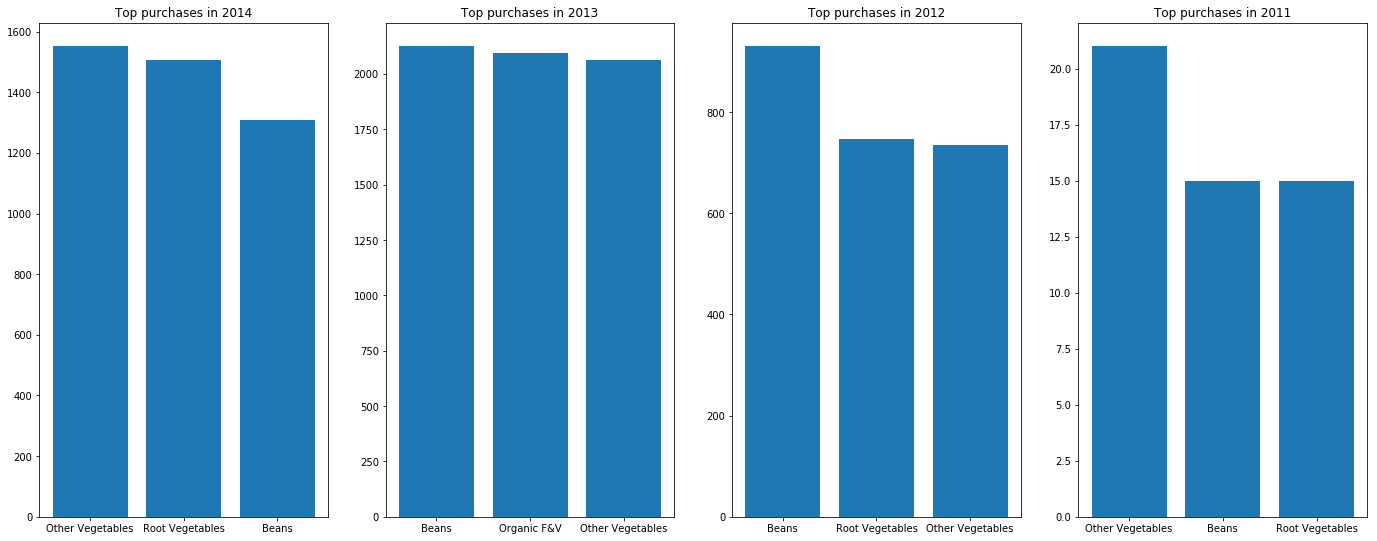

In [153]:
plt.figure(figsize=(30,20))
i=1
for year in bb.data['Year'].unique():
    x_axis=[bb.data[bb.data['Year']==year]['Description'].value_counts()[0:3].index]
    y_axis=[bb.data[bb.data['Year']==year]['Description'].value_counts()[0:3].values]
    plt.subplot(2,5,i)
    plt.bar(x_axis[0],y_axis[0])
    plt.title('Top purchases in '+str(year))
    i+=1

### It seems that Beans, Root Vegatables, and Organic Vegatables are the most purchsed product over the years

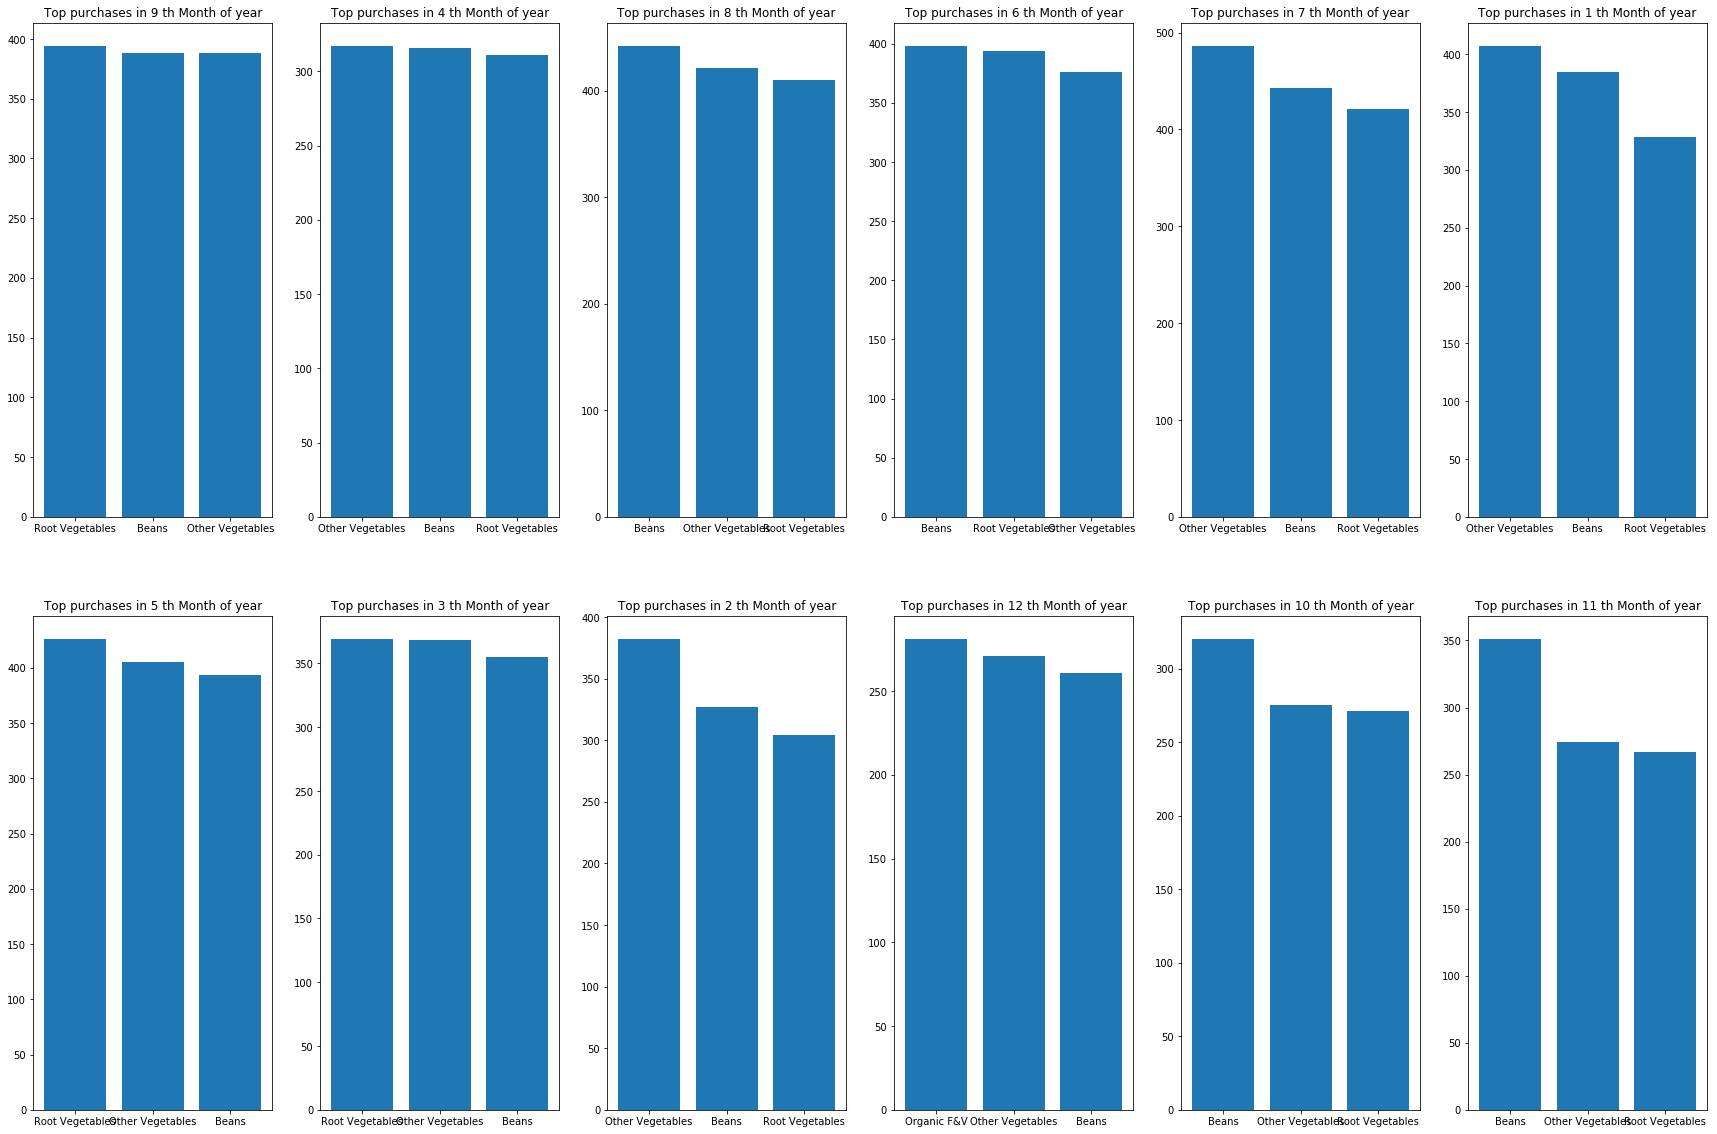

In [156]:
plt.figure(figsize=(30,20))
i=1
for month in bb.data['Month'].unique():
    x_axis=[bb.data[bb.data['Month']==month]['Description'].value_counts()[0:3].index]
    y_axis=[bb.data[bb.data['Month']==month]['Description'].value_counts()[0:3].values]
    plt.subplot(2,6,i)
    plt.bar(x_axis[0],y_axis[0])
    plt.title('Top purchases in '+str(month)+' th Month of year')
    i+=1

### Based on the most purchased products and the changing trends over the years and months, it seems that Beans, Other vegatables and Root vegetables are something which can be recommended to new users

# Creating clusters for different user groups

In [173]:
top1=[]
top2=[]
top3=[]
top4=[]
members=[]
for member in bb.data['Member'].unique():
    members.append(member)
    top1.append(bb.data[bb.data['Member']==member]['Description'].value_counts()[0:4].index[0])
    top2.append(bb.data[bb.data['Member']==member]['Description'].value_counts()[0:4].index[1])
    top3.append(bb.data[bb.data['Member']==member]['Description'].value_counts()[0:4].index[2])
    top4.append(bb.data[bb.data['Member']==member]['Description'].value_counts()[0:4].index[3])


In [182]:
t1=[]
t2=[]
t3=[]
t4=[]
for i,row in bb.data.iterrows():
    index = members.index(row['Member'])
    t1.append(top1[index])
    t2.append(top2[index])
    t3.append(top3[index])
    t4.append(top4[index])

In [184]:
bb.data['Top1']=t1
bb.data['Top2']=t2
bb.data['Top3']=t3
bb.data['Top4']=t4


#### Label Encoding the data

In [215]:
products=list(bb.data['Top1'])+list(bb.data['Top2'])+list(bb.data['Top3'])+list(bb.data['Top4'])
products=list(set(products))
product_dictionary={}
product_dictionary={ products[i]: i for i in range(len(products))}

In [217]:
cluster_data=bb.data[['Top1', 'Top2', 'Top3', 'Top4']]
for column in cluster_data.columns:
    cluster_data[column]=cluster_data[column].apply(lambda x: product_dictionary[x])

/home/blink/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Creating clusters with Kmeans

100%|██████████| 38/38 [00:40<00:00,  1.71s/it]


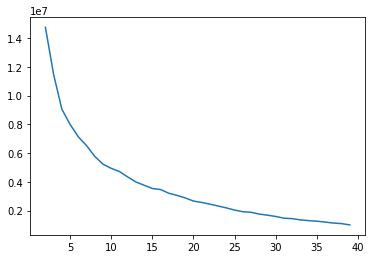

In [253]:
import numpy as np
from sklearn.cluster  import KMeans
from tqdm import tqdm
scores=[]
for i in tqdm(range(2,40)):
    km=KMeans(n_clusters=i)
    km.fit(cluster_data)
    scores.append(km.inertia_)

plt.plot(np.arange(2,40),scores)

In [255]:
km=KMeans(n_clusters=5)
km.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [256]:
classes=km.predict(cluster_data)

In [257]:
bb.data['Cluster']=classes

In [258]:
bb.data[bb.data['Cluster']==1].head()

,Member,Order,SKU,Date,Description,Month,Day,Year,Top1,Top2,Top3,Top4,Cluster
554,M39021,6422636,7580802,2014-09-28,Sunflower Oils,9,28,2014,Beans,Root Vegetables,Sunflower Oils,Other Vegetables,1
555,M39021,6422636,15668453,2014-09-28,Brinjals,9,28,2014,Beans,Root Vegetables,Sunflower Oils,Other Vegetables,1
556,M39021,6422636,15668375,2014-09-28,Root Vegetables,9,28,2014,Beans,Root Vegetables,Sunflower Oils,Other Vegetables,1
557,M39021,6422636,15668379,2014-09-28,Other Vegetables,9,28,2014,Beans,Root Vegetables,Sunflower Oils,Other Vegetables,1
558,M39021,6422636,15669760,2014-09-28,Whole Spices,9,28,2014,Beans,Root Vegetables,Sunflower Oils,Other Vegetables,1


In [259]:
bb.data[bb.data['Cluster']==0].head()

,Member,Order,SKU,Date,Description,Month,Day,Year,Top1,Top2,Top3,Top4,Cluster
3240,M82651,6439410,15669863,2014-04-10,Moong Dal,4,10,2014,Other Vegetables,Whole Spices,Other Dals,Root Vegetables,0
3241,M82651,6439410,34987566,2014-04-10,Whole Spices,4,10,2014,Other Vegetables,Whole Spices,Other Dals,Root Vegetables,0
3242,M82651,6439410,7573023,2014-04-10,Shaving Blade & Razors,4,10,2014,Other Vegetables,Whole Spices,Other Dals,Root Vegetables,0
3243,M82651,6439410,15669765,2014-04-10,Urad Dal,4,10,2014,Other Vegetables,Whole Spices,Other Dals,Root Vegetables,0
3244,M82651,6439410,15669885,2014-04-10,Moong Dal,4,10,2014,Other Vegetables,Whole Spices,Other Dals,Root Vegetables,0


In [260]:
bb.data[bb.data['Cluster']==2].head()

,Member,Order,SKU,Date,Description,Month,Day,Year,Top1,Top2,Top3,Top4,Cluster
969,M47229,6764413,7621580,2014-02-07,Diapers & Wipes,2,7,2014,Beans,Root Vegetables,Other Vegetables,Whole Spices,2
970,M47229,6764413,92866692,2014-02-07,Diapers & Wipes,2,7,2014,Beans,Root Vegetables,Other Vegetables,Whole Spices,2
971,M47229,6764413,7630963,2014-02-07,Tomato Ketchup,2,7,2014,Beans,Root Vegetables,Other Vegetables,Whole Spices,2
972,M47229,6810613,15669870,2014-06-27,Sooji & Rava,6,27,2014,Beans,Root Vegetables,Other Vegetables,Whole Spices,2
973,M47229,6810613,15668473,2014-06-27,Beans,6,27,2014,Beans,Root Vegetables,Other Vegetables,Whole Spices,2


In [261]:
bb.data[bb.data['Cluster']==3].head()

,Member,Order,SKU,Date,Description,Month,Day,Year,Top1,Top2,Top3,Top4,Cluster
0,M09736,6468572,34993740,2014-09-22,Other Sauces,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,3
1,M09736,6468572,15669800,2014-09-22,Cashews,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,3
2,M09736,6468572,34989501,2014-09-22,Other Dals,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,3
3,M09736,6468572,7572303,2014-09-22,Namkeen,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,3
4,M09736,6468572,15669856,2014-09-22,Sugar,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,3


In [262]:
bb.data[bb.data['Cluster']==4].head()

,Member,Order,SKU,Date,Description,Month,Day,Year,Top1,Top2,Top3,Top4,Cluster
2203,M78365,6470598,34986122,2014-09-23,Whole Spices,9,23,2014,Root Vegetables,Other Vegetables,Whole Spices,Gourd & Cucumber,4
2204,M78365,6470598,34993759,2014-09-23,Other Sauces,9,23,2014,Root Vegetables,Other Vegetables,Whole Spices,Gourd & Cucumber,4
2205,M78365,6470598,34986118,2014-09-23,Whole Spices,9,23,2014,Root Vegetables,Other Vegetables,Whole Spices,Gourd & Cucumber,4
2206,M78365,6470598,21408913,2014-09-23,Whole Spices,9,23,2014,Root Vegetables,Other Vegetables,Whole Spices,Gourd & Cucumber,4
2207,M78365,6470598,34993740,2014-09-23,Other Sauces,9,23,2014,Root Vegetables,Other Vegetables,Whole Spices,Gourd & Cucumber,4
